Multi Layer Perceptron Classifier

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import shuffle

df = pd.read_csv('african_crises.csv')
df = shuffle(df, random_state=11)
df.reset_index(inplace=True, drop=True)
# converting into useful numbers

df['banking_crisis'] = df['banking_crisis'].replace('crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(1)
df['banking_crisis'] = df['banking_crisis'].replace('no_crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(0)

# removing unneccesary data

df.drop(['cc3','country'], axis=1, inplace=True)

# scaling the data

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['banking_crisis'] = df['banking_crisis']
df = df_scaled

# defining the input data, X, and the desired results, y

X = df.loc[:,df.columns != 'banking_crisis']
y = df.loc[:, 'banking_crisis']

# breaking data into training data, validation data, and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2,shuffle=False)

# constructing a Multilayer Perceptron

model = Sequential()
model.add(Dense(32,activation = 'relu', input_dim = 11))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) # adam, rmsprop, sgd

model.summary()
# training the network

model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=2)

# scoring it on the data it trained on as well as test data

scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
11/11 - 1s - loss: 0.5323 - accuracy: 0.8863
Epoch 2/10
11/11 - 0s - loss: 0.4260 - accuracy: 0.9173
Epoch 3/10
11/11 - 0s - loss: 0.3564 - accuracy: 0.9173
Epoch 4/10
11/11 - 0s - loss: 0.2994 - accuracy: 0.9202
Epoch 5/10
11/11 - 0s - loss: 0.2514 - accuracy: 0.9247
Epoch 6/10
11/11 - 0s - loss: 0.2116 - accuracy: 0.9380
Epoch 7/10
11/11 - 0s - loss: 0.1792 - accuracy: 0.9

Multi Layer Perceptron Regressor

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
11/11 [==============================] - 1s 18ms/step - loss: 22.0100 - mae: 22.0100 - val_loss: 23.1502 - val_mae: 23.1502
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 21.6590 - mae: 21.6590 - val_loss: 22.8761 - val_mae: 22.8761
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 21.2793 - mae: 21.2793 - val_loss: 22.5800

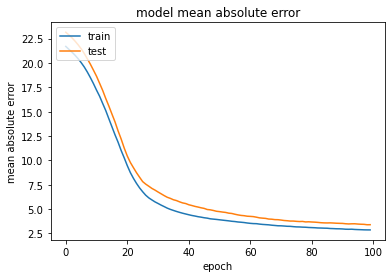

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data()

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model = Sequential()
model.add(Dense(8, input_shape=[X_train.shape[1]], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.summary()

model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mae'])


history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, verbose=1)

print(model.evaluate(X_test_scaled, y_test))


# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Radial Basis Function Classifier

In [8]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.losses import binary_crossentropy
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class RBF(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBF, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBF, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


df = pd.read_csv('african_crises.csv')
df = shuffle(df, random_state=11)
df.reset_index(inplace=True, drop=True)
# converting into useful numbers

df['banking_crisis'] = df['banking_crisis'].replace('crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(1)
df['banking_crisis'] = df['banking_crisis'].replace('no_crisis',np.nan)
df['banking_crisis'] = df['banking_crisis'].fillna(0)

# removing unneccesary data

df.drop(['cc3','country'], axis=1, inplace=True)

# scaling the data

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled['banking_crisis'] = df['banking_crisis']
df = df_scaled

# defining the input data, X, and the desired results, y

X = df.loc[:,df.columns != 'banking_crisis']
y = df.loc[:, 'banking_crisis']

# breaking data into training data, validation data, and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,shuffle=False)


model = Sequential()
input = Input(shape=(X_train.shape[1],))
rbf=RBF(10, 0.5)(input)
out=Dense(1, activation='sigmoid')(rbf)

model = Model(inputs=input, outputs=out)

model.compile(optimizer='rmsprop', loss=binary_crossentropy, metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=256, epochs=30)

scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

Epoch 1/30
4/4 [==============================] - 1s 2ms/step - loss: 0.7273 - accuracy: 0.1873
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.3095
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.4261
Epoch 4/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.6920
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.8526
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.8639
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.8734
Epoch 8/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.9081
Epoch 9/30
4/4 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.9064
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.9052
Epoch 11/30
4/4 [======================

Convolutional Neural Network - LeNet5

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='relu', input_shape=(32, 32, 1), padding="valid"))

# S1 Pooling Layer
model.add(MaxPooling2D(pool_size=2, strides=2))

# C2 Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='relu', input_shape=(14, 14, 6), padding="valid"))

# S2 Pooling Layer
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the output in order to feed the fully connected layers
model.add(Flatten())

# FC1 Fully Connected Layer
model.add(Dense(units=120, activation='relu'))

# FC2 Fully Connected Layer
model.add(Dense(units=84, activation='relu'))

# FC3 Fully Connected Layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

Convolutional Neural Network - AlexNet

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()


# 1st Convolutional Layer
model.add(Conv2D(filters=96, activation='relu',input_shape=(224, 224, 3), kernel_size=(11, 11), strides=(4, 4)))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, activation='relu', kernel_size=(11, 11), strides=(1, 1)))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, activation='relu', kernel_size=(3, 3), strides=(1, 1)))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, activation='relu', kernel_size=(3, 3), strides=(1, 1)))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, activation='relu', kernel_size=(3, 3), strides=(1, 1)))
# Pooling
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())


# 1st Dense Layer
model.add(Dense(4096, activation='relu', input_shape=(224*224*3,)))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096, activation='relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000, activation='relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 384)        

Pretrained networks - InceptionV3


In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

model = InceptionV3(input_tensor=Input(shape=(224, 224, 3)) , weights='imagenet', include_top=True)

model.summary()

96116736/96112376 [==============================] - 10s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 111, 111, 32) 96          conv2d_7[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_8[0][0]      
_____________________